## 1. Создайте объект, который представляет собой книжную полку и продемонстрируйте ее работу

Книжная полка хранит объекты класса Book

У нее есть размер - количество книг, которое может в ней поместиться

Есть методы, которые позволяют положить книгу на полку и взять книгу с полки

Также есть метод, который показывает содержимое полки

In [193]:
class Book:

    def __init__(self, author, title):
        self.author = author
        self.title = title
        self.bookmark = None

    def __str__(self):
        return f"{self.author}, {self.title}"

    def set_bookmark(self, page_number):
        print(f'Закладка установлена на странице {page_number}')
        self.bookmark = page_number

    def __eq__(self, other):
        return self.title == other.title and self.author == self.author

    def get_bookmark(self):
        print(f'Закладка на странице {self.bookmark}')
        return self.bookmark

In [194]:
class BookStand:

    def __init__(self, n):
        if isinstance(n, int):
            self.size = n
            self.books = []
        else:
            raise ValueError(f"n must be int, not {type(n).__name__}")

    def __repr__(self):
        return f"book shelf with size {self.size}"

    def put_book(self, book):
        if len(self.books) < self.size:
            if book not in self.books:
                self.books.append(book)
                print(f'{book.title} by {book.author} appended on the stand')
            else:
                print('Book on the stand')
        else:
            print('Book stand is full')

    def get_book(self, book):
        if len(self.books) != 0:
            if book in self.books:
                self.books.remove(book)
                print(f'You get {book.title} by {book.author}')
            else:
                print('No such book on the stand')
        else:
            print('No books on the stand')

    def books_on_stand(self):
        print("Currently on the shelf")
        for book in self.books:
            print(book)


In [195]:
book1 = Book("Марк Лутц","Изучаем Python том 1")
book2 = Book("Марк Лутц","Изучаем Python том 2")
book3 = Book("Лев Толстой","Война и мир том 1")
book4 = Book("Лев Толстой","Война и мир том 2")
book5 = Book("Лев Толстой","Война и мир том 3")
book6 = Book("Лев Толстой","Война и мир том 3")

In [197]:
book4 == book6

False

In [184]:
stand = BookStand(6)

In [185]:
stand.put_book(book1)

Изучаем Python том 1 by Марк Лутц appended on the stand


In [186]:
stand.put_book(book2)

Изучаем Python том 2 by Марк Лутц appended on the stand


In [187]:
stand.put_book(book3)

Война и мир том 1 by Лев Толстой appended on the stand


In [188]:
stand.put_book(book4)

Война и мир том 2 by Лев Толстой appended on the stand


In [189]:
stand.put_book(book5)

Война и мир том 3 by Лев Толстой appended on the stand


In [190]:
stand.put_book(book6)

Война и мир том 3 by Лев Толстой appended on the stand


In [148]:
stand.get_book(book2)

EQ
EQ
EQ
EQ
You get Изучаем Python том 2 by Марк Лутц


In [149]:
stand.put_book(book6)

EQ
EQ
EQ
EQ
EQ
EQ
EQ
EQ
Война и мир том 4 by Лев Толстой appended on the stand


In [150]:
stand.books_on_stand()

Currently on the shelf
Марк Лутц, Изучаем Python том 1
Лев Толстой, Война и мир том 1
Лев Толстой, Война и мир том 2
Лев Толстой, Война и мир том 3
Лев Толстой, Война и мир том 4


## 2. Спортивное задание
### Создайте класс Атлет

У атлета есть имя и уровень крутости от 1 до 10
атлет должен уметь бегать, в зависимости от уровня он может преодолевать дистанцию быстрее
### Создайте класс Команда

У команды есть название и участники - атлеты
### Создайте класс Cоревнование

Соревнование позволяет запустить эстафету
Замерять общее бега время для всей команды
Выводить результаты по командам в виде таблицы или графика
Создайте n команд, в которых у атлетов разные/случайные уровни крутости, и проведите эстафету

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Athletes:

    def __init__(self, name, level = 1):
        self.name = name
        self.level = level
        print(self.name,',',self.level)

In [61]:
class Team:

    def __init__(self, name):
        self.name = name
        self.members = []
        self.score = 0

    def append_members(self, *members):
        self.members.extend(members)
        for member in members:
            self.score += member.level
        print(self.score)

In [16]:
class Competition:

    def __init__(self, teams):
        self.teams = teams
        self.scores = {}

    def count_score(self):
        all_teams = []
        team_level = []
        for team in self.teams:
            all_teams.append(team.name)
            team_level.append(team.score)

        self.scores['Teams'] = all_teams
        self.scores['Levels'] = team_level



    def results(self):

        data = pd.DataFrame(self.scores)
        data.plot(kind='bar', x="Teams", y="Levels")
        plt.title('Results of competition', fontsize=20)
        plt.show()
        return data.head()




In [17]:
athlete_1 = Athletes('Lucy', np.random.randint(1, 10))

Lucy , 9


In [18]:
athlete_2 = Athletes('Mey', np.random.randint(1, 10))

Mey , 3


In [19]:
athlete_3 = Athletes('Rey', np.random.randint(1, 10))

Rey , 9


In [20]:
athlete_4 = Athletes('Bob', np.random.randint(1, 10))

Bob , 2


In [62]:
team_1 = Team('Flash')

In [63]:
team_2 = Team('Star')

In [66]:
team_1.append_members(athlete_1, athlete_2)

12


In [67]:
team_2.append_members(athlete_3, athlete_4)

22


In [68]:
competition_1 = Competition([team_1, team_2])

In [69]:
competition_1.count_score()

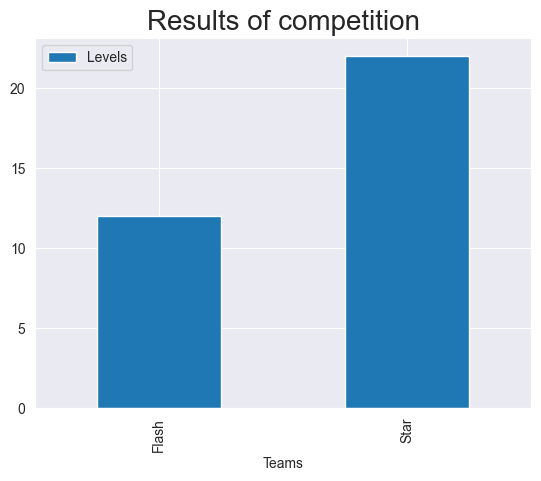

,Teams,Levels
0,Flash,12
1,Star,22


In [70]:
competition_1.results()